<a href="https://colab.research.google.com/github/eccardoso/mvp-analise-de-dados-e-boas-praticas/blob/main/MVP_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas
**Edson da Costa Cardoso**

### **MVP**

O que não está detalhado ou pode ser melhorado neste notebook para ficar como esperamos para o MVP:

Blocos de texto que expliquem textualmente cada etapa e cada decisão do seu código, contando uma história completa e compreensível, do início ao fim;
Boas práticas de codificação;
Após cada gráfico, escrever 1 parágrafo resumindo os principais achados, analisando os resultados e levantando eventuais pontos de atenção.

### **1. Definição do Problema**




O dataset usado neste projeto será a base de Dados de Violência no Estado do Rio de Janeiro no período de Jan/2014 a Fev/2021 por municipio e um subconjunto dos tipos de crimes praticados. Seu objetivo é indicar o nível de risco em (10 ?) um determinado munícipio do Rio de Janeiro prever se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico médico. Este dataset é um subconjunto do dataset original e aqui, todos os pacientes são mulheres com pelo menos 21 anos de idade e de herança indígena Pima. O dataset apresenta em diversos atributos relacionados a dados médicos e uma variável de classe binária (0 ou 1). As variáveis ​​preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante. Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
# Importar bibliotecas para a programação
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### **2. Carga de Dados**

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv disponível no github.

Com o dataset carregado, iremos explorá-lo um pouco.

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/eccardoso/mvp-analise-de-dados-e-boas-praticas/main/BaseMunicipioMensalv3.csv"

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url,  delimiter=';')

In [ ]:
dataset.head()

,fmun_cod,fmun,ano,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
0,3300100,Angra dos Reis,2014,1,Interior,11,0,0,1,7,23,134,0,21,12
1,3300159,Aperibé,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
2,3300209,Araruama,2014,1,Interior,2,0,0,0,7,23,105,0,18,4
3,3300225,Areal,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
4,3300233,Armação dos Búzios,2014,1,Interior,2,0,0,0,6,12,117,0,4,10


### **3. Análise de Dados**

**3.1. Estatísticas Descritivas**


Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset
print(dataset.shape)

(7912, 15)


In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7912 entries, 0 to 7911
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   fmun_cod                 7912 non-null   int64 
 1   fmun                     7912 non-null   object
 2   ano                      7912 non-null   int64 
 3   mes                      7912 non-null   int64 
 4   regiao                   7912 non-null   object
 5   hom_doloso               7912 non-null   int64 
 6   lesao_corp_morte         7912 non-null   int64 
 7   latrocinio               7912 non-null   int64 
 8   hom_por_interv_policial  7912 non-null   int64 
 9   estupro                  7912 non-null   int64 
 10  roubos                   7912 non-null   int64 
 11  furtos                   7912 non-null   int64 
 12  sequestro_relampago      7912 non-null   int64 
 13  estelionato              7912 non-null   int64 
 14  trafico_drogas           7912 non-null  

In [ ]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,fmun_cod,fmun,ano,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
0,3300100,Angra dos Reis,2014,1,Interior,11,0,0,1,7,23,134,0,21,12
1,3300159,Aperibé,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
2,3300209,Araruama,2014,1,Interior,2,0,0,0,7,23,105,0,18,4
3,3300225,Areal,2014,1,Interior,0,0,0,0,0,0,0,0,0,0
4,3300233,Armação dos Búzios,2014,1,Interior,2,0,0,0,6,12,117,0,4,10
5,3300258,Arraial do Cabo,2014,1,Interior,0,0,0,0,2,6,49,0,8,10
6,3300308,Barra do Piraí,2014,1,Interior,1,0,0,0,5,7,38,0,4,5
7,3300407,Barra Mansa,2014,1,Interior,5,0,0,0,4,18,122,0,5,10
8,3300456,Belford Roxo,2014,1,Baixada Fluminense,29,0,0,0,11,307,170,0,29,29
9,3300506,Bom Jardim,2014,1,Interior,0,0,0,0,1,2,9,0,3,2


In [ ]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,fmun_cod,fmun,ano,mes,regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
7902,3305604,Silva Jardim,2021,2,Interior,0,0,0,0,0,2,11,0,0,0
7903,3305703,Sumidouro,2021,2,Interior,0,0,0,0,1,0,0,0,1,3
7904,3305752,Tanguá,2021,2,Interior,0,0,0,0,1,6,12,0,2,1
7905,3305802,Teresópolis,2021,2,Interior,1,0,0,0,5,5,37,0,35,24
7906,3305901,Trajano de Moraes,2021,2,Interior,0,0,0,0,0,0,0,0,0,0
7907,3306008,Três Rios,2021,2,Interior,0,0,0,0,2,11,33,0,17,32
7908,3306107,Valença,2021,2,Interior,0,0,0,0,0,2,18,0,8,7
7909,3306156,Varre-Sai,2021,2,Interior,0,0,0,0,0,0,3,0,1,0
7910,3306206,Vassouras,2021,2,Interior,1,0,0,1,1,1,4,0,9,6
7911,3306305,Volta Redonda,2021,2,Interior,4,0,0,1,6,56,119,0,100,22


In [ ]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

fmun_cod                    int64
fmun                       object
ano                         int64
mes                         int64
regiao                     object
hom_doloso                  int64
lesao_corp_morte            int64
latrocinio                  int64
hom_por_interv_policial     int64
estupro                     int64
roubos                      int64
furtos                      int64
sequestro_relampago         int64
estelionato                 int64
trafico_drogas              int64
dtype: object

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,fmun_cod,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,estupro,roubos,furtos,sequestro_relampago,estelionato,trafico_drogas
count,7.912000e+03,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000,7912.000000
mean,3.303128e+06,2017.093023,6.383721,4.124747,0.038675,0.147118,1.032609,4.626896,167.048534,139.586830,0.102503,34.016431,11.150910
std,1.840157e+03,2.066629,3.494963,12.285731,0.256914,0.718919,4.872507,14.830456,884.592601,785.963201,0.764352,193.680621,26.287785
min,3.300100e+06,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.301578e+06,2015.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,1.000000
50%,3.303154e+06,2017.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,19.000000,0.000000,3.000000,4.000000
75%,3.304632e+06,2019.000000,9.000000,3.000000,0.000000,0.000000,0.000000,4.000000,30.000000,70.250000,0.000000,15.000000,12.000000
max,3.306305e+06,2021.000000,12.000000,146.000000,5.000000,17.000000,92.000000,194.000000,12087.000000,11045.000000,21.000000,3502.000000,384.000000


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos age, pedi e test seguem uma distribuição exponencial, e que as colunas mass e press seguem uma distribuição aproximadamente normal.

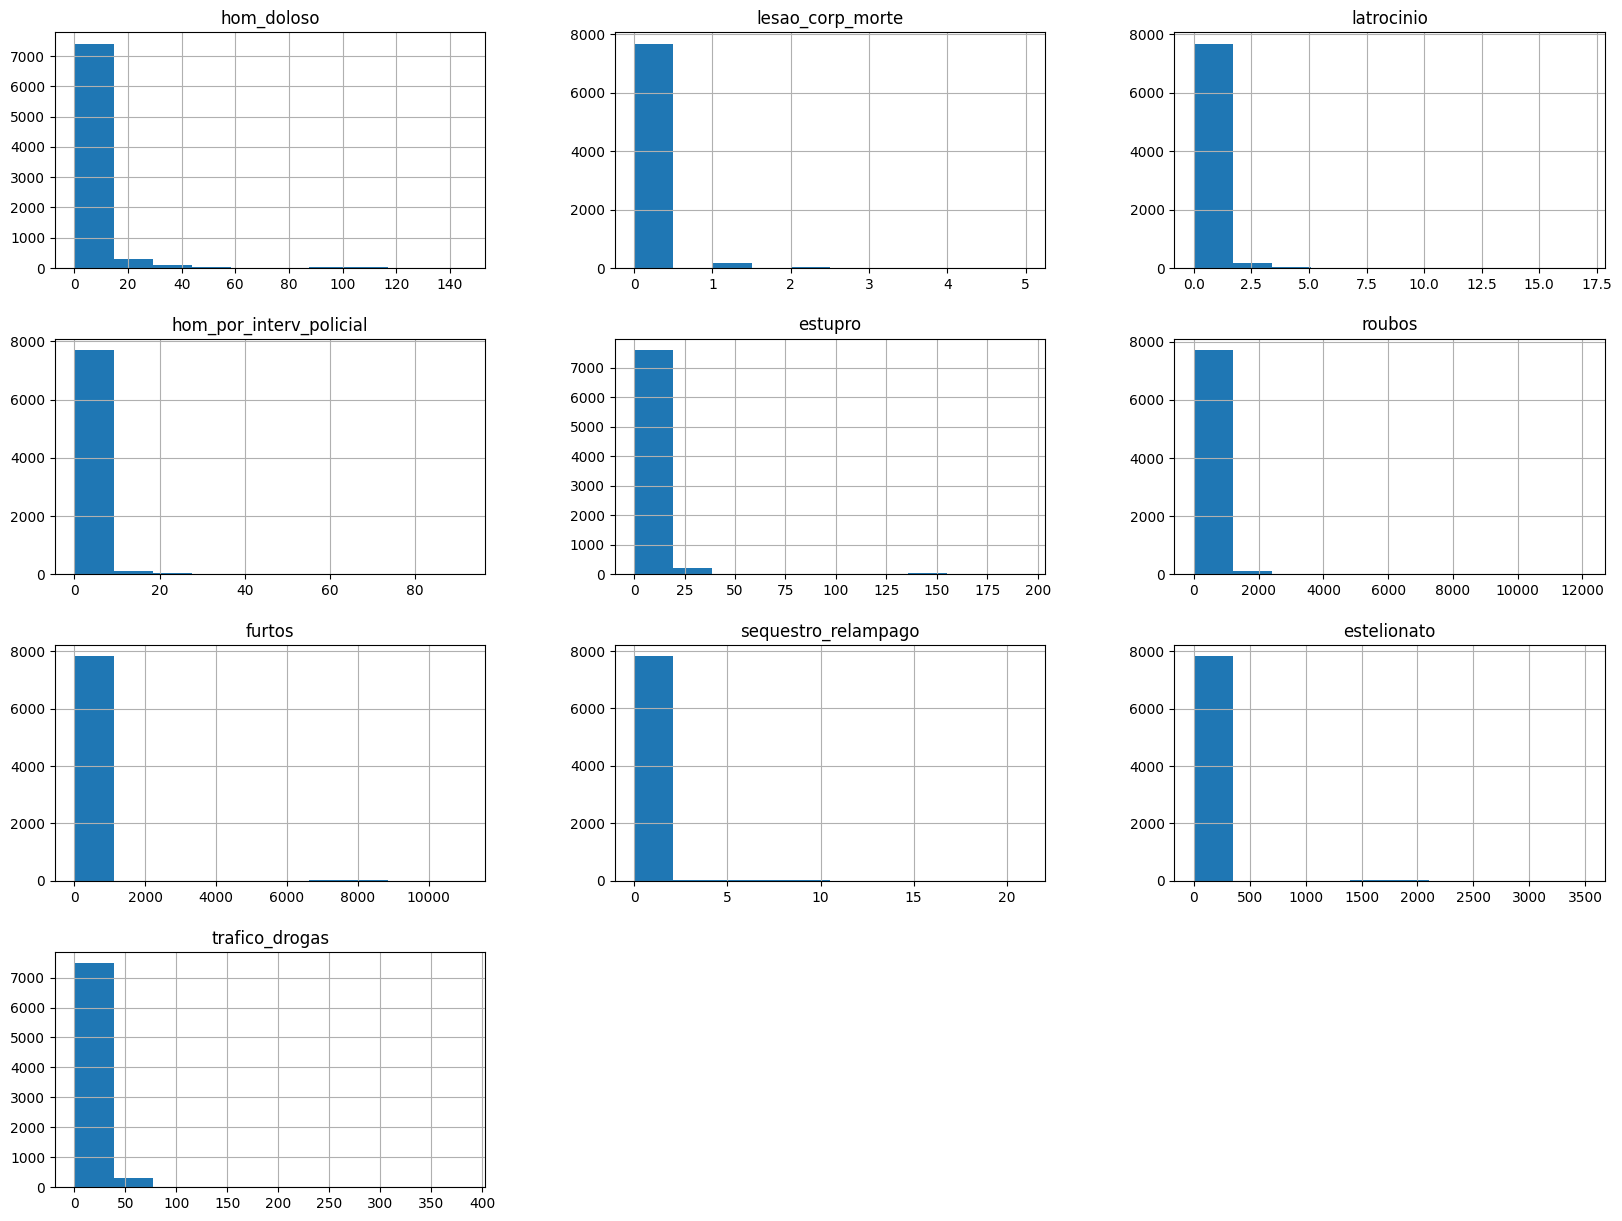

In [ ]:
datasetclone=dataset.iloc[:,4:]
datasetclone.head(10)
datasetclone.hist(figsize = (20,15))
plt.show()



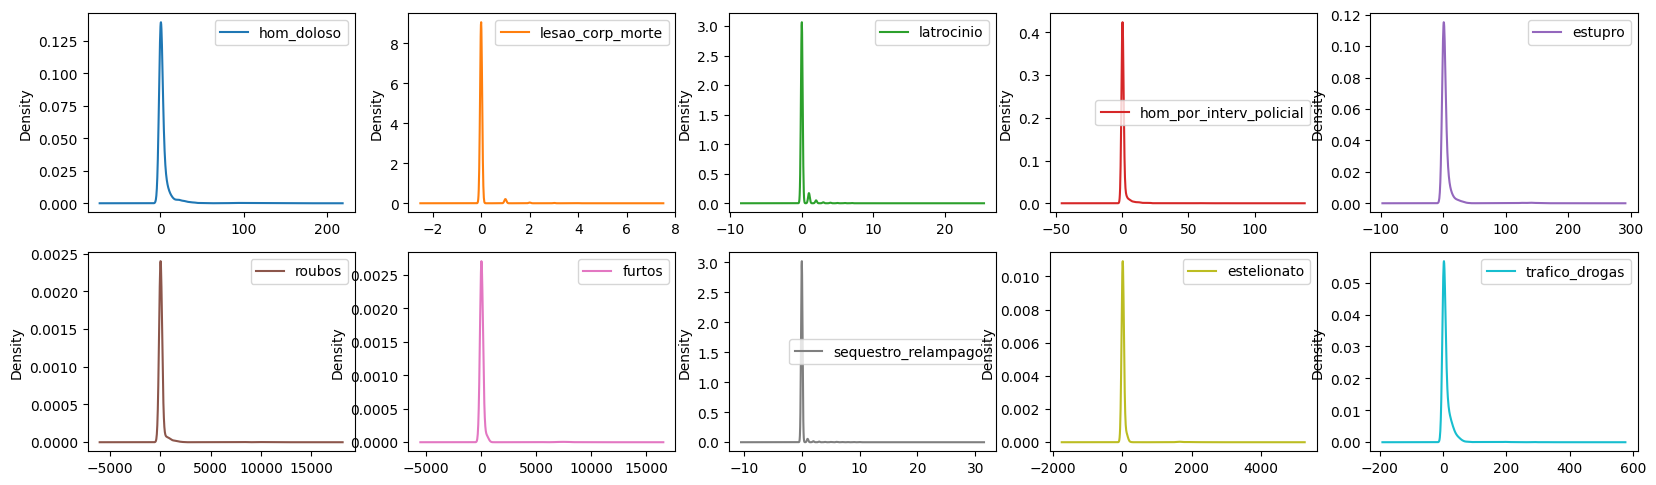

In [ ]:
# Density Plot
datasetclone.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize = (20,15))
plt.show()

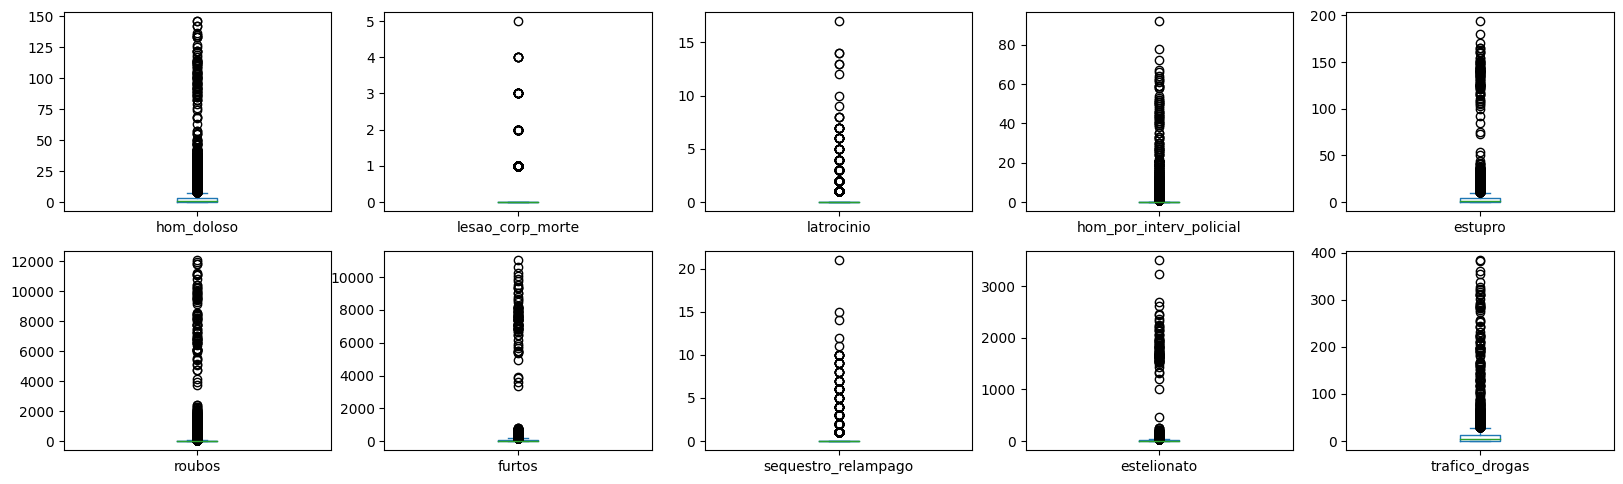

In [ ]:
# Boxplot
datasetclone.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (20,15))
plt.show()

<ipython-input-78-cac8e4d6a863>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datasetclone.corr(), annot=True, cmap='RdBu');


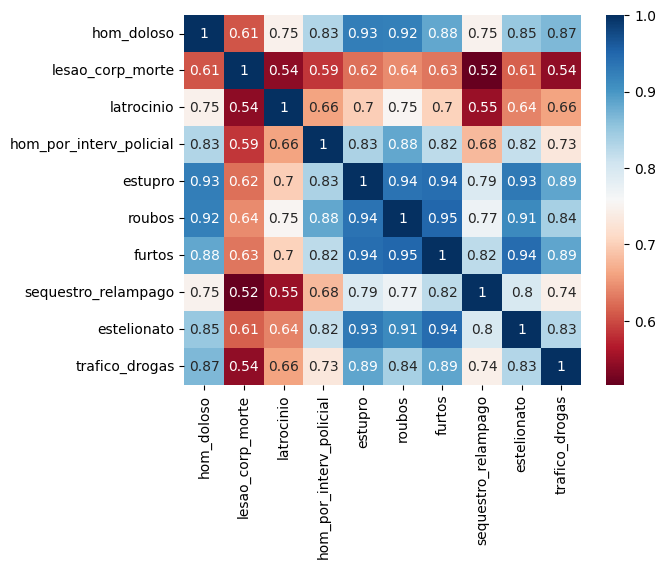

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(datasetclone.corr(), annot=True, cmap='RdBu');

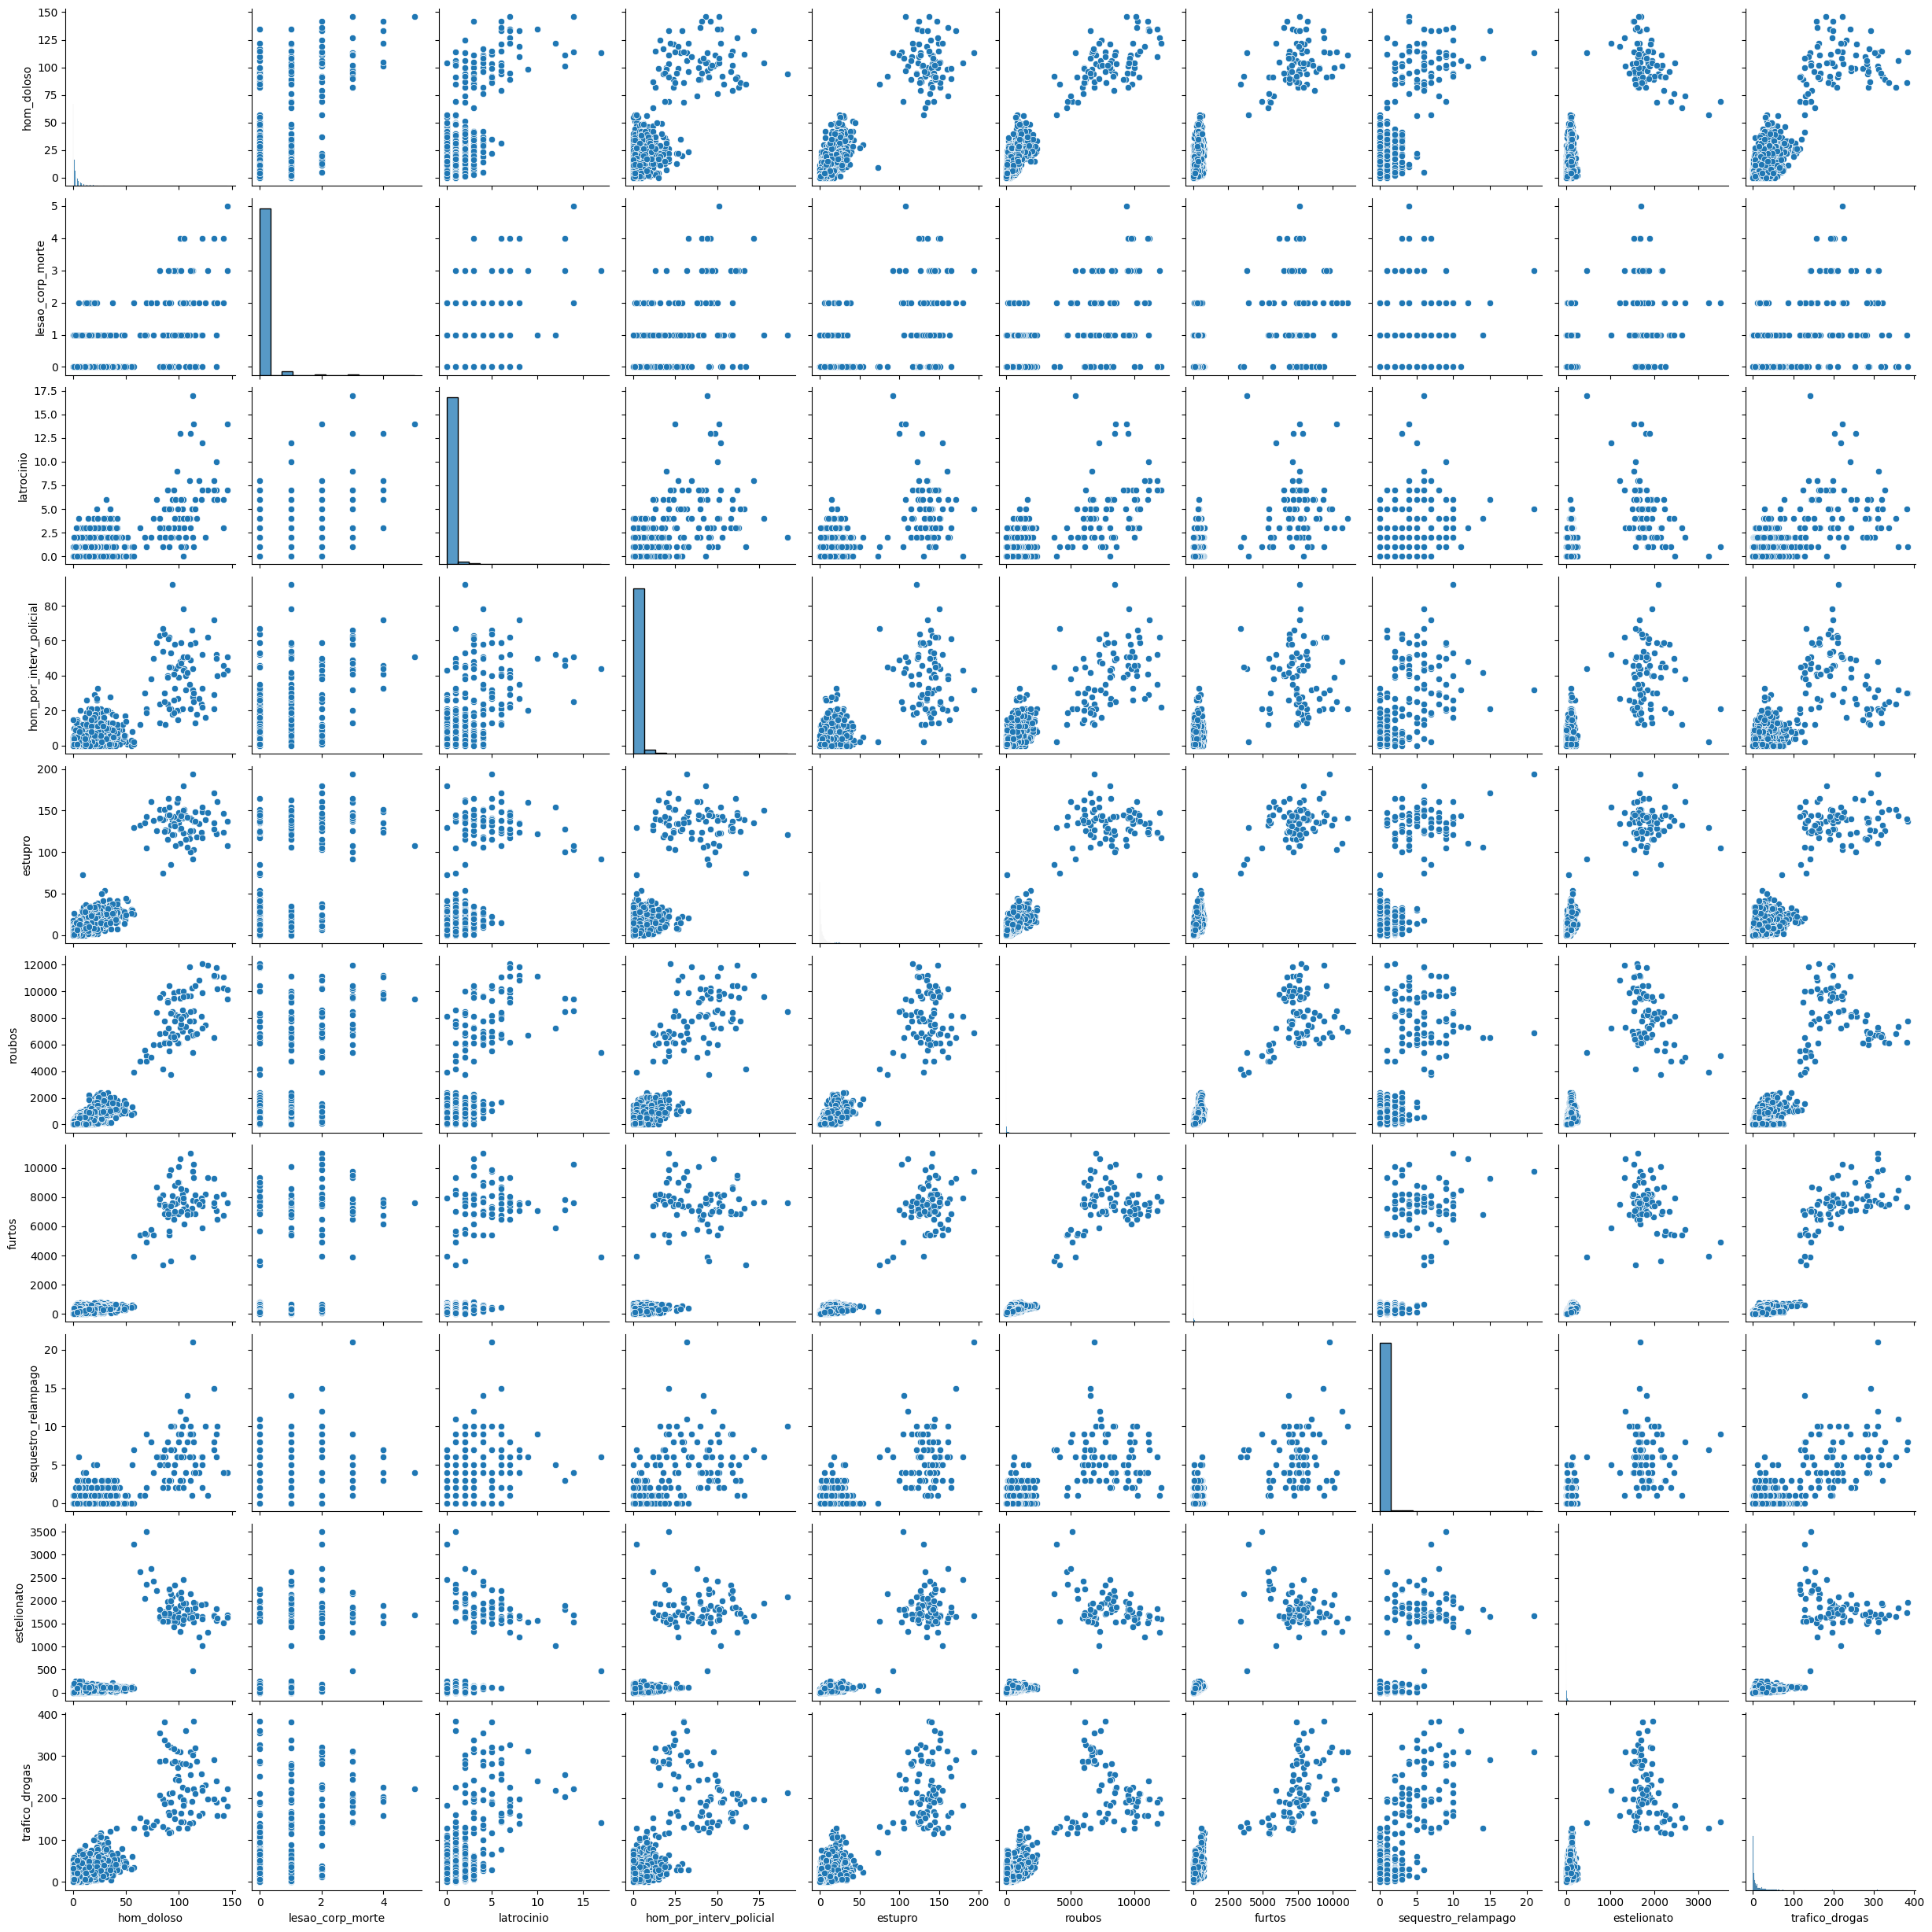

In [ ]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(datasetclone)

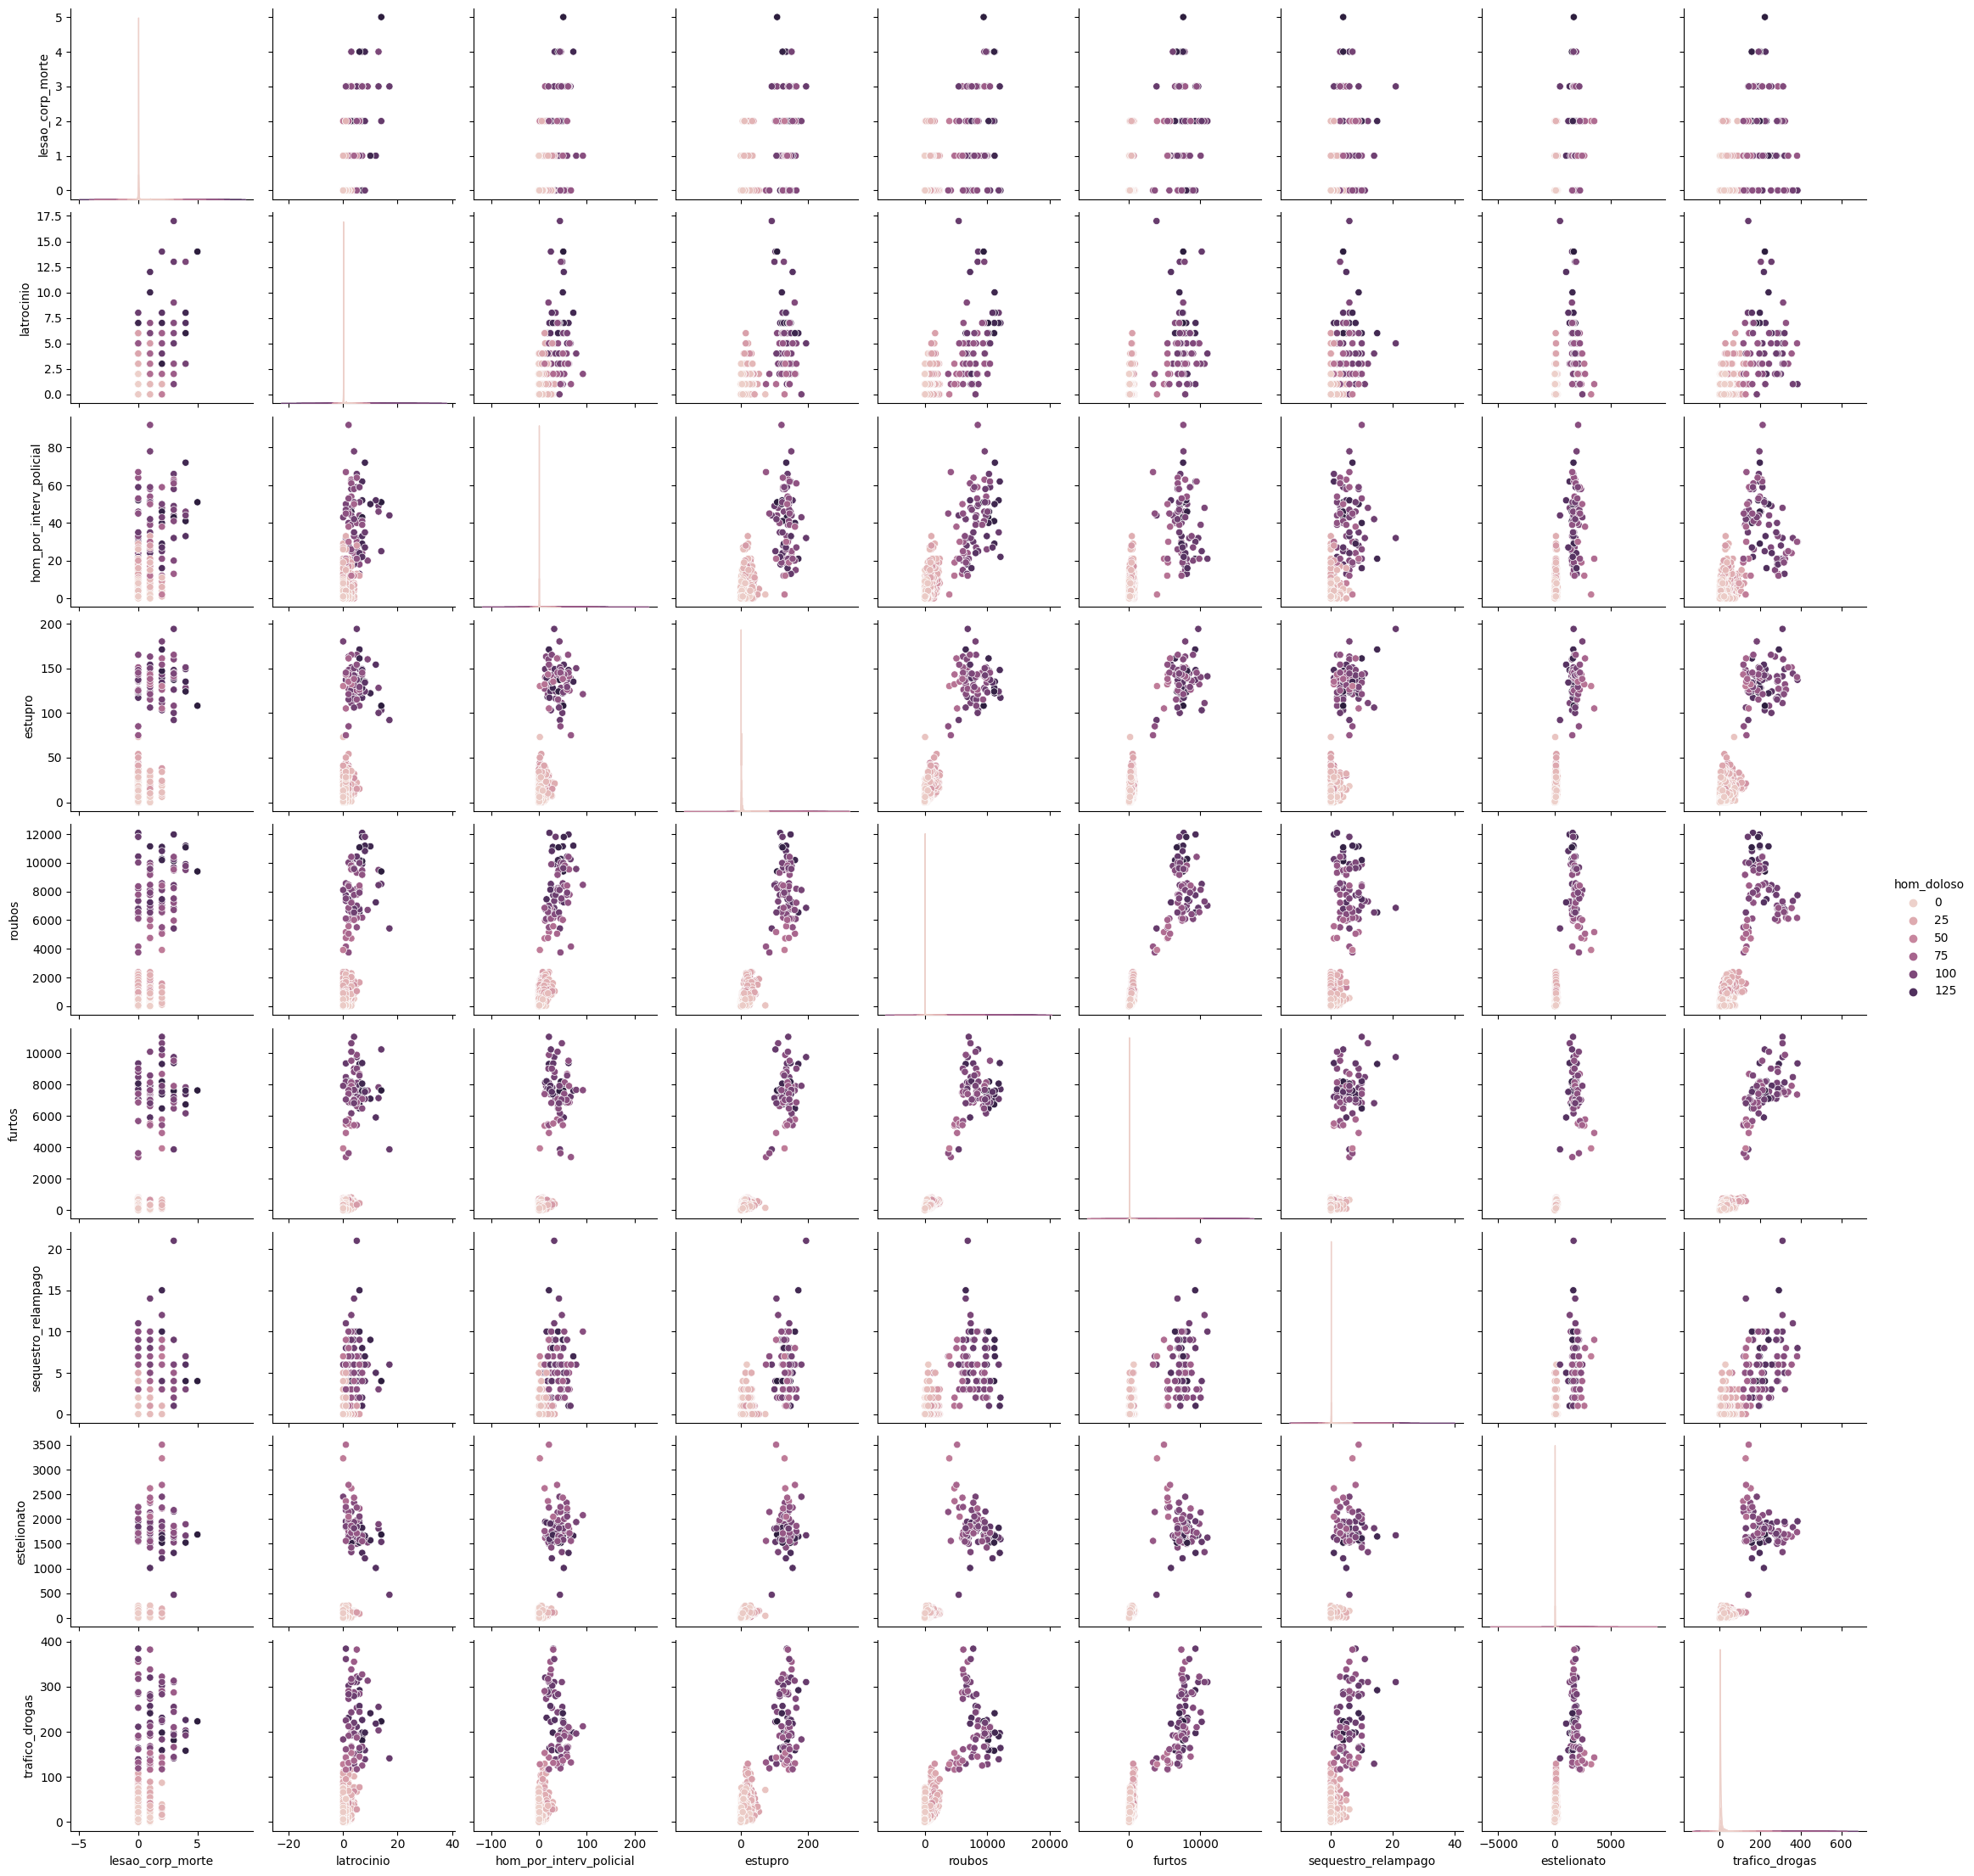

In [ ]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(datasetclone, hue = "hom_doloso", height = 2.5);



In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

fmun_cod                   0
fmun                       0
ano                        0
mes                        0
regiao                     0
hom_doloso                 0
lesao_corp_morte           0
latrocinio                 0
hom_por_interv_policial    0
estupro                    0
roubos                     0
furtos                     0
sequestro_relampago        0
estelionato                0
trafico_drogas             0
dtype: int64